**Recuperação de Informação com base no Conteúdo Visual**

**Descrição de imagens**

Descritor representa a propriedade de uma imagem. O descritor deve ser invariante a rotação, escala, etc.

Exemplo de uma forma (muito simples) de se obter uma representação númerica sobre a imagem por meio de histograma de cor.

In [4]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow

In [2]:
%%time
img_lena = cv2.imread('lena.png', 0)

# cv2_imshow(img_lena)
cv2.imshow('Lena', img_lena)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist, bins = np.histogram(img_lena.ravel(), 256, [0,256])

print(bins)
print(hist)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

**Plotting Histograms**

In [3]:
from matplotlib import pyplot as plt

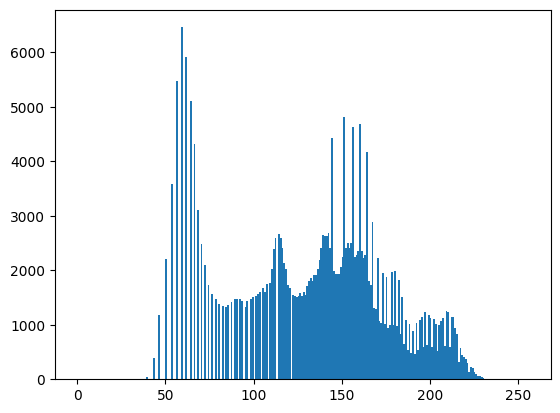

In [4]:
plt.hist(img_lena.ravel(), 256, [0, 256])
plt.show()

Histograma de cor da imagem nos três canais RGB

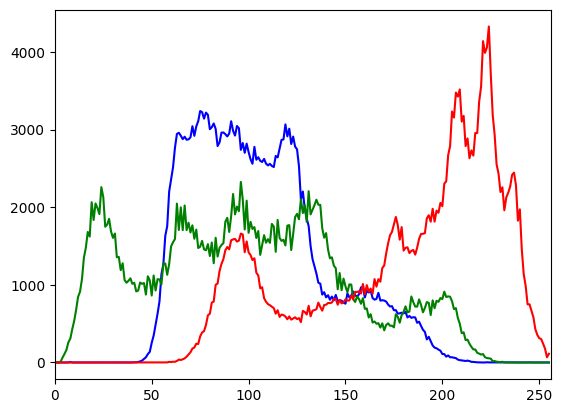

In [5]:
img_lena_bgr = cv2.imread('lena.png')

# cv2_imshow(img_lena_bgr)
cv2.imshow('Lena', img_lena_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img_lena_bgr],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()

**Feature Detection and Description**

**Features Locais**

Features locais: Padrão que se difere da vizinhança local. 
Pontos de interesse: cantos (corners), regiões, etc..

**BRIEF (Binary Robust Independent Elementary Features)**

In [6]:
# para imprimir a matriz completa, descomentar as duas linhas abaixo
# import sys
# np.set_printoptions(threshold=sys.maxsize)

In [7]:
# BRIEF não possui detector de pontos de interesse
# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

In [11]:
img_baggage = cv2.imread('baggage_claim.jpg')
cv2.imshow('Lena', img_baggage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# find the keypoints with STAR
kp = star.detect(img_baggage, None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_baggage, kp)

print(len(kp))
print(feat.shape)
print(feat)

479
(479, 32)
[[ 75  12 156 ...  62 164 184]
 [207 174 149 ...  22  63 152]
 [ 76  70 133 ... 104 174 243]
 ...
 [177 240 110 ... 190 224 205]
 [231 185 243 ... 135  59 128]
 [ 17   1 104 ... 215 129 127]]


**ORB (Oriented FAST and Rotated BRIEF)**

In [12]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img_baggage,None)

print(np.shape(des1))
print(des1)

(500, 32)
[[172 149  60 ... 121 212 146]
 [ 50 183 233 ... 204 180 249]
 [ 86  75 134 ...  54  57   4]
 ...
 [ 27  75 183 ... 125 165 172]
 [100  24 151 ... 113  37   3]
 [ 72  60 187 ... 193 103  43]]


Matching de features locais entre duas imagens

In [14]:
import imutils

In [15]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [16]:
img1 = cv2.imread('baggage_claim.jpg',0)             
img2 = cv2.imread('baggage_claim.jpg',0)  

# rotate image 180° 
rotated = imutils.rotate(img2, 180)
img2 = rotated

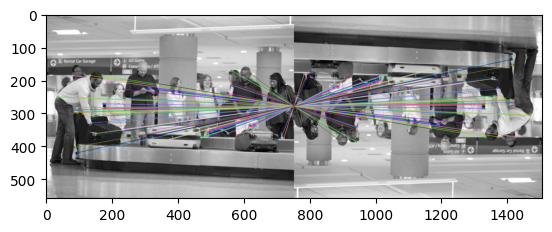

(<matplotlib.image.AxesImage at 0x215d07e3bf0>, None)

In [18]:
# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img1,None)
kp2, desc2 = orb.detectAndCompute(img2,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100],None,flags=2)

plt.imshow(img3),plt.show()

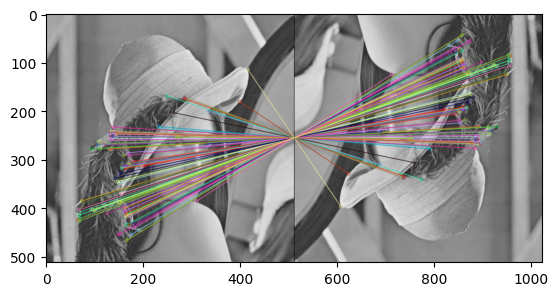

(<matplotlib.image.AxesImage at 0x215d0ac0860>, None)

In [20]:
# rotate image 180° 
rotated = imutils.rotate(img_lena, 180)
img_lena_rotated = rotated

# find the keypoints and descriptors with SIFT
kp1, desc1 = orb.detectAndCompute(img_lena,None)
kp2, desc2 = orb.detectAndCompute(img_lena_rotated,None)

# Match descriptors.
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img_lena_matches = cv2.drawMatches(img_lena, kp1, img_lena_rotated, kp2, matches[:100], None, flags=2)

plt.imshow(img_lena_matches),plt.show()

**Busca de vídeo com base em conteúdo visual**

**Lendo um vídeo em OpenCV**

Abre e extrai keyframes do vídeo salvando em disco

In [1]:
from os import listdir
from os.path import isfile, join
import os
import os.path
import sys
import pickle

In [2]:
frames_dir = "frames/"

features_dir = "features/"

cluster_dir = "cluster/"

bow_dir = "bow/"

videos = "videos/"

search = "search/"

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)  

if not os.path.exists(features_dir):
    os.makedirs(features_dir)  
  
if not os.path.exists(cluster_dir):
    os.makedirs(cluster_dir)  

if not os.path.exists(bow_dir):
    os.makedirs(bow_dir)

if not os.path.exists(videos):
    os.makedirs(videos)

if not os.path.exists(search):
    os.makedirs(search)

In [5]:
# video path
video_dir = "videos/"

# video file
video = "videos/airport.mp4"

# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

# frames per second
video_frames = 30

# frame id
id_frame = 0

ret = True
while ret:
    # capture frame by frame
    ret, frame = cap.read()

    # video length
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if (id_frame % video_frames) == 0 and ret:

        print("Proccessing frame " + str(id_frame) + " of " + str(length))

        frame_path = os.path.join(frames_dir, str(id_frame) + ".png")

        # salva a imagem (frame) no disco
        cv2.imwrite(frame_path, frame)
    
    id_frame += 1
  
print("Done")

Proccessing frame 0 of 749
Proccessing frame 30 of 749
Proccessing frame 60 of 749
Proccessing frame 90 of 749
Proccessing frame 120 of 749
Proccessing frame 150 of 749
Proccessing frame 180 of 749
Proccessing frame 210 of 749
Proccessing frame 240 of 749
Proccessing frame 270 of 749
Proccessing frame 300 of 749
Proccessing frame 330 of 749
Proccessing frame 360 of 749
Proccessing frame 390 of 749
Proccessing frame 420 of 749
Proccessing frame 450 of 749
Proccessing frame 480 of 749
Proccessing frame 510 of 749
Proccessing frame 540 of 749
Proccessing frame 570 of 749
Proccessing frame 600 of 749
Proccessing frame 630 of 749
Proccessing frame 660 of 749
Proccessing frame 690 of 749
Proccessing frame 720 of 749
Done


In [6]:
frame = cv2.imread('frames/450.png')
# cv2_imshow(frame)
cv2.imshow('Frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

Extraindo descritores do frames do vídeo usando BRIEF Descriptor

In [7]:
# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(frames_dir):
    onlyfiles = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        print(file)
    
        img_path = join(frames_dir, file)

        img = cv2.imread(img_path)

        # opcional: redimensiona a imagem
        # img = cv2.resize(
        #  img, (160, 160), interpolation=cv2.INTER_CUBIC)
        
        # Initiate STAR detector
        star = cv2.xfeatures2d.StarDetector_create()

        # Initiate BRIEF extractor
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

        # find the keypoints with STAR
        kp = star.detect(img,None)

        # compute the descriptors with BRIEF
        kp, feat = brief.compute(img, kp)        

        print(len(kp))
        print(np.shape(feat))
        # print(feat)

        feat_path = join(features_dir, file)

        # store the data as binary data stream
        with open(feat_path + ".brief", "wb") as f:            
            pickle.dump(feat.tolist(), f)        

        # f = open(feat_path + ".brief.txt", "w")
        # f.write(str(feat.tolist()))
        # f.close()

0.png
419
(419, 32)
120.png
478
(478, 32)
150.png
459
(459, 32)
180.png
507
(507, 32)
210.png
168
(168, 32)
240.png
164
(164, 32)
270.png
176
(176, 32)
30.png
477
(477, 32)
300.png
149
(149, 32)
330.png
151
(151, 32)
360.png
155
(155, 32)
390.png
395
(395, 32)
420.png
101
(101, 32)
450.png
209
(209, 32)
480.png
139
(139, 32)
510.png
70
(70, 32)
540.png
423
(423, 32)
570.png
431
(431, 32)
60.png
474
(474, 32)
600.png
503
(503, 32)
630.png
496
(496, 32)
660.png
434
(434, 32)
690.png
469
(469, 32)
720.png
59
(59, 32)
90.png
467
(467, 32)


**Criação do vocabulário visual**

**1. Clusterização**

In [8]:
from sklearn.cluster import KMeans
import time

In [11]:
cluster_file = cluster_dir + "cluster.cluster"

In [12]:
# número de clusters
k = 64

# núimeros de dimensões das features
dim = 32

In [13]:
# salva o vocabulário criado (centroids) em disco
def saveCentroids (kmeans, output_file, dim):
    i = 0
    desc = ""

    for k in np.nditer(kmeans.cluster_centers_):        
        a = np.array(k).round(2)
        desc += str(a) + " "
        i += 1        

        if (i % dim) == 0:
            desc += "\n" 

    output_file.write(desc)

In [14]:
listOfFeat = []

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
        # print(file)
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)

        # print(feat)

        for item in feat:
            listOfFeat.append(item)

output_file = open(cluster_file, 'w')

# print( np.asarray(listOfFeat) )
print( np.asarray(listOfFeat).shape )
# output_file.write(np.asarray(listOfFeat[0]))
    
t1 = time.time()  
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.asarray(listOfFeat))
t2 = time.time()
tf = t2 - t1

print(tf)

saveCentroids (kmeans, output_file, dim)  
output_file.close()

(7973, 32)


c:\Users\mcoel\Documents\self_repos\Colab-AI-PucMinas\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mcoel\Documents\self_repos\Colab-AI-PucMinas\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.5063424110412598


In [ ]:
!cat cluster/cluster.cluster

**2. Bag of Visual Word**

In [15]:
%%time
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

# leitura das imagens do diretório
onlyfiles = []
if os.path.exists(features_dir):
    onlyfiles = [f for f in listdir(features_dir) if isfile(join(features_dir, f))]

    bowOfImages = []    
    
    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:
    
        feat_path = join(features_dir, file)

        with open(feat_path, 'rb') as f:
            # read the data as binary data stream
            feat = pickle.load(f)        

        # inicializa o BoW da imagem com zero para cada dimensão
        bow = [0] * clusters

        # procedimento força bruta para cálculo de distância (euclidean distance)
        for item in feat:
            result = sys.float_info.max
            centroid_id = 0

            for id, c in enumerate(centroids):
               # Euclidean Distance 
               dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
               if dist < result:
                  result = dist
                  centroid_id = id

            bow[centroid_id] += 1                     
        
        bow_path = join(bow_dir, file)

        with open(bow_path + ".bow", 'w') as f:
            for item in bow:
                f.write("%s " % item)

print("Done")

Done
CPU times: total: 2.78 s
Wall time: 5.86 s


In [ ]:
!cat bow/450.png.brief.bow

**Busca**

Utilizando um arquivo de BoW de uma imagem do próprio vídeo

In [16]:
%%time
# leitura das imagens do diretório

q = np.loadtxt(bow_dir + "450.png.brief.bow")

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

0.png.brief.bow: 50.23942674832188
120.png.brief.bow: 58.02585630561603
150.png.brief.bow: 51.536394906900505
180.png.brief.bow: 58.9406481131655
210.png.brief.bow: 27.0
240.png.brief.bow: 30.14962686336267
270.png.brief.bow: 29.068883707497267
30.png.brief.bow: 55.5517776493246
300.png.brief.bow: 27.459060435491963
330.png.brief.bow: 28.035691537752374
360.png.brief.bow: 30.919249667480614
390.png.brief.bow: 38.781438859330635
420.png.brief.bow: 28.879058156387302
450.png.brief.bow: 0.0
480.png.brief.bow: 27.202941017470888
510.png.brief.bow: 30.773365106858236
540.png.brief.bow: 47.7283982551269
570.png.brief.bow: 44.24929377967517
60.png.brief.bow: 57.47173218200405
600.png.brief.bow: 54.86346689738081
630.png.brief.bow: 51.176166327695945
660.png.brief.bow: 47.06378650300037
690.png.brief.bow: 49.37610758251404
720.png.brief.bow: 37.067505985701274
90.png.brief.bow: 54.35071296680477
CPU times: total: 0 ns
Wall time: 214 ms


Altere a quantidade de clsuter para k = 64 e repita o procedimento acima, compare os resultados de cálculo de distância. O que mudou em relação às distâncias calculadas?

**Utilizando uma nova imagem qualquer**

Calculando features locais da imagem de consulta

In [17]:
frame2 = cv2.imread('search/beluga.jpg')
cv2.imshow('Frame2', frame2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
search_dir = "search/"
q = search_dir + "beluga.jpg"
q_feature = q + ".brief"
q_bow = q_feature + ".bow"

In [19]:
img_search = cv2.imread(q)

# Initiate STAR detector
star = cv2.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img_search,None)

# compute the descriptors with BRIEF
kp, feat = brief.compute(img_search, kp)        

print(len(kp))
print(np.shape(feat))
# print(feat)

# store the data as binary data stream
with open(q_feature, "wb") as f:            
  pickle.dump(feat.tolist(), f)        

280
(280, 32)


Calculando BoW da imagem de consulta (observe que o mesmo vocabulário visual calculado anteriormente é utilizado)

In [20]:
# leitura dos centroids do arquivo
centroids = np.loadtxt(cluster_file)

# obtem o número de centroids (palavras visuais)
clusters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    # read the data as binary data stream
    feat = pickle.load(f)        

    # inicializa o BoW da imagem com zero para cada dimensão
    bow = [0] * clusters

    # procedimento força bruta para cálculo de distância (euclidean distance)
    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
              result = dist
              centroid_id = id

        bow[centroid_id] += 1                     

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write("%s " % item)

print("Done")

Done


In [ ]:
!cat search/beluga.jpg.brief.bow

Realizando a consulta

In [21]:
# leitura das imagens do diretório

q = np.loadtxt(q_bow)

onlyfiles = []
if os.path.exists(bow_dir):
    onlyfiles = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

    # processa cada arquivo de imagem de um diretório
    for file in onlyfiles:

        feat_path = join(bow_dir, file)

        item = np.loadtxt(feat_path)

        # print(item)
        # print(item.shape)

        dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

        print(str(file) + ": " + str(dist))

0.png.brief.bow: 45.155287619502545
120.png.brief.bow: 52.478567053607705
150.png.brief.bow: 47.54997371187496
180.png.brief.bow: 53.76802023508026
210.png.brief.bow: 31.906112267087632
240.png.brief.bow: 32.526911934581186
270.png.brief.bow: 32.4037034920393
30.png.brief.bow: 51.21523210920751
300.png.brief.bow: 32.32645975048923
330.png.brief.bow: 32.48076353782343
360.png.brief.bow: 33.421549934136806
390.png.brief.bow: 38.66522985836241
420.png.brief.bow: 35.566838487557476
450.png.brief.bow: 30.675723300355934
480.png.brief.bow: 31.76476034853718
510.png.brief.bow: 36.6333181680284
540.png.brief.bow: 45.552167895721496
570.png.brief.bow: 40.28647415696737
60.png.brief.bow: 51.82663407939975
600.png.brief.bow: 48.79549159502341
630.png.brief.bow: 46.36809247747852
660.png.brief.bow: 42.80186911806539
690.png.brief.bow: 44.86646854834911
720.png.brief.bow: 44.57577817604534
90.png.brief.bow: 48.979587585033826


In [23]:
frame3 = cv2.imread('frames/210.png')
cv2.imshow('Frame3', frame3)
cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2_imshow(frame)